In [1]:
import numpy as np
import pandas as pd

In [2]:
artist_data = pd.read_csv('data/data_by_artist.csv')
all_data = pd.read_csv('data/data.csv')

In [3]:
print(all_data.keys())
all_data.describe()

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [4]:
print(artist_data[artist_data['artists'] == 'Daft Punk'])

        artists  acousticness  danceability    duration_ms    energy  \
5336  Daft Punk      0.230077      0.623265  265758.821656  0.626898   

      instrumentalness  liveness   loudness  speechiness      tempo   valence  \
5336          0.543886  0.194704 -10.835662     0.095534  118.30386  0.404098   

      popularity  key  mode  count  
5336   53.127389    1     1    157  


In [5]:
print(artist_data.keys())
artist_data.describe()

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


In [6]:
# make array [artist, year, num_hits]
# hit will be defined as popularity over 50

hits = all_data[all_data['popularity'] >= 40]

To predict hits in a future year from an artist we need hits in past years which is not a column of the dataset.

In [7]:
hits_by_artist = {} # format:    key = artist, val = { key = year: val = hits in that year}

for artists, year in zip(hits['artists'], hits['year']):
    artists = artists.replace("'", '')
    artists = artists.replace(']', '')
    artists = artists.replace('[', '')
    artists = artists.split(',')  # split artist list into individual artists
    for artist in artists:
        if artist not in hits_by_artist:  
            hits_by_artist[artist] = {year: 1}
        elif year not in hits_by_artist[artist]:
            hits_by_artist[artist] = {year: 1}
        else:
            hits_by_artist[artist][year] += 1
            


In [8]:
ha = pd.DataFrame(hits_by_artist)

In [9]:
ha.shape

(82, 18680)

In [10]:
spa = {}  # songs per artist
for artists in all_data['artists']:
    artists = artists.replace("'", '')
    artists = artists.replace(']', '')
    artists = artists.replace('[', '')
    artists = artists.split(',')
    for artist in artists:
        if artist in spa:
            spa[artist] += 1
        else:
            spa[artist] = 1
        

In [11]:
avg_spa = sum(spa.values()) / len(spa.keys())
print(f'average songs per artist {avg_spa}')
std_spa = np.std(np.array(list(spa.values())))
print(f'standard dev of songs per artist {std_spa}')

average songs per artist 7.208192970190046
standard dev of songs per artist 29.729626103807224


In [12]:
spa['Kendrick Lamar']
spa

{'Carl Woitschach': 21,
 'Robert Schumann': 253,
 ' Vladimir Horowitz': 609,
 'Seweryn Goszczyński': 76,
 'Francisco Canaro': 2234,
 'Frédéric Chopin': 1033,
 'Felix Mendelssohn': 104,
 'Franz Liszt': 131,
 ' Charlo': 466,
 'Sergei Rachmaninoff': 176,
 'Samuel Barber': 66,
 'Ludwig van Beethoven': 976,
 ' Staatskapelle Berlin': 70,
 ' Richard Strauss': 4,
 'George Butterworth': 12,
 ' John Cameron': 11,
 'Alexander Scriabin': 122,
 ' Luis Scalon': 4,
 'Thomas Arne': 5,
 ' John Heddle Nash': 8,
 'Moritz Moszkowski': 11,
 'Roger Quilter': 8,
 'Hafız Yaşar': 2,
 'Muzio Clementi': 28,
 'Ignacio Corsini': 620,
 'Shungi Music Crew': 10,
 'Perchicot': 8,
 'Dmitry Kabalevsky': 6,
 'Paul Whiteman': 25,
 'Ted Weems & His Orchestra': 42,
 'Taj Mahal': 33,
 'John Raitt': 3,
 'Leroy Carr': 40,
 'Hikmet Rıza Hanım': 2,
 'Elsie Houston': 11,
 'Αντώνης Νταλγκάς': 27,
 'Stellakis Perpiniadis': 71,
 'Αντώνης Διαμαντίδης': 24,
 'S. Loukopoulos': 3,
 ' Klarino G. Anestopoulos': 22,
 ' Klarino KOstas Giaou

In [13]:
spa_py = {}   # songs per artist per year artist : {year : num songs})
for artists, year in zip(all_data['artists'], all_data['year']):
    artists = artists.replace("'", '')
    artists = artists.replace(']', '')
    artists = artists.replace('[', '')
    artists = artists.split(',')
    for artist in artists:
        if not artist in spa_py:
            spa_py[artist] = {year: 1}
        elif year in spa_py[artist]:
            spa_py[artist][year] += 1
        else:
            spa_py[artist][year] = 1


In [14]:
print(spa_py['Kendrick Lamar'])

{2011: 15, 2015: 14, 2010: 11, 2017: 14, 2012: 28, 2016: 5, 2018: 1, 2013: 1, 2014: 1}


In [15]:
# find statistics that could help predict how many hits an artist is likely to produce in a given year
# average time between album releases
# average songs per album
# average popularity per song
# std time between releases
# std songs per album
# std popularity per song
# years since last album

In [16]:
avg_time_sngs = {}  # artist : avg time between albums / song releases
std_time_sngs = {}
t_last_sng = {}

for artist in spa_py.keys():
    releases = sorted(list(spa_py[artist].keys()))
    time = []
    for year, next_year in zip(releases[:-1], releases[1:]):
        time.append(next_year - year)
    try:
        avg_time = sum(time) / (len(releases) - 1)
    except ZeroDivisionError as e:
        avg_time = time
    avg_time_sngs[artist] = avg_time
    std_time_sngs[artist] = np.std(np.array(time))
    
for artist in spa_py.keys():
    t_last_sng[artist] = 2020 - sorted(list(spa_py[artist]))[-1]
    

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
print(t_last_sng['Daft Punk'])
print(t_last_sng['Kendrick Lamar'])

7
2


In [18]:
avg_sngs_albm = {}  # artist : average songs released per album / releases
std_sngs_album = {}

for artist in spa_py.keys():
    spa = []
    for songs in spa_py[artist].values():
        spa.append(songs)
    avg_sngs_albm[artist] = sum(spa) / len(spa)
    std_sngs_album[artist] = np.std(np.array(spa))


In [19]:
from collections import defaultdict
avg_pop_sng = defaultdict(list)  # artist : average popularity of song
std_pop_sng = {}

for artists, pop in zip(all_data['artists'], all_data['popularity']):
    artists = artists.replace("'", '')
    artists = artists.replace(']', '')
    artists = artists.replace('[', '')
    artists = artists.split(',')
    for artist in artists:
        avg_pop_sng[artist].append(pop)
    
for artist in avg_pop_sng.keys():
    std_pop_sng[artist] = np.std(np.array(avg_pop_sng[artist]))
    avg_pop_sng[artist] = sum(avg_pop_sng[artist]) / len(avg_pop_sng[artist])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa503c7af10>,
      dtype=object)

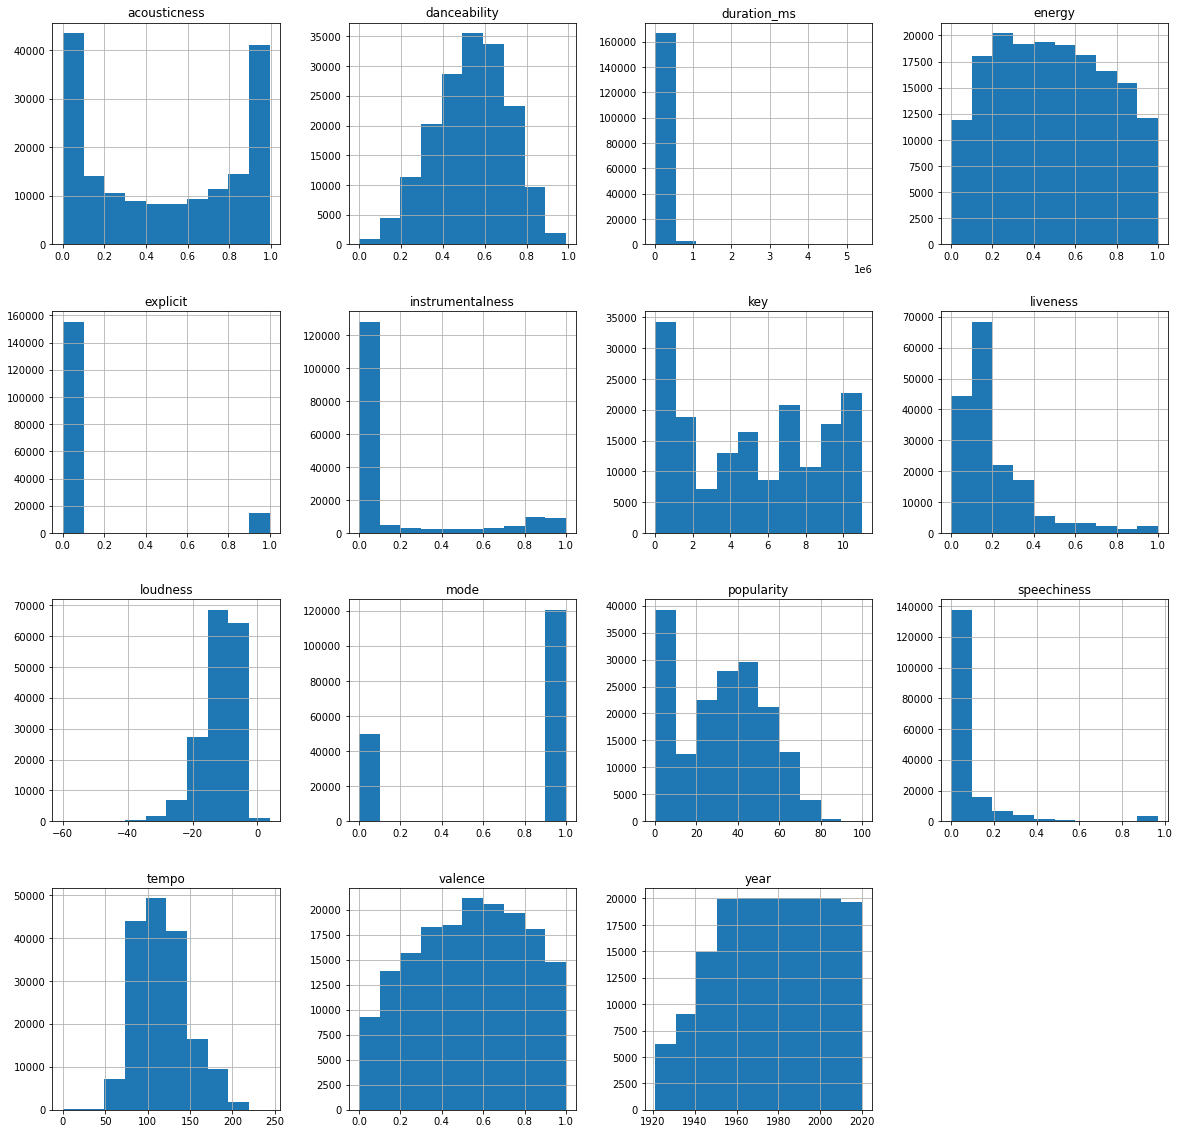

In [20]:
all_data.hist(figsize=(20,20))

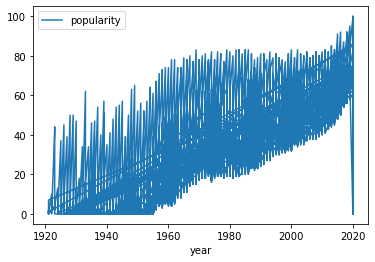

In [21]:
all_data.plot('year', 'popularity')

In [22]:
del all_data['popularity']

In [23]:
del all_data['artists']

In [24]:
del all_data['id']

In [25]:
del all_data['name']

In [26]:
del all_data['release_date']

In [27]:
from sklearn.decomposition import PCA
pca_tf = PCA(n_components='mle')
features = pca_tf.fit_transform(all_data)
features.shape

(169909, 13)

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
transformer = SelectKBest(mutual_info_regression, k=8)
#k_best = transformer.fit_transform()

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
k_s = [i for i in range(20)]

In [31]:
billboards = pd.read_csv('data/BIllboards.csv')

In [32]:
billboards_features = pd.read_csv('data/billboard_features.csv')

In [33]:
billboards = billboards.sort_values(by=['Weeks on Chart'],ascending=False)
billboards = billboards.drop_duplicates(subset=['Song'])
billboards.sort_values(by=['Song'])
billboards_features = billboards_features.sort_values(['Song'])
billboards = billboards.sort_values(['Song'])

In [34]:
billboards = billboards[['Week Position','Song','Performer','Instance','Previous Week Position','Peak Position','Weeks on Chart']]

In [35]:
feature_cols = ['Performer', 'Song', 'spotify_genre',
       'spotify_track_explicit', 'spotify_track_duration_ms',
       'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']
billboards_features = billboards_features[feature_cols]

In [36]:
print(billboards_features.shape)
print(billboards_features.dropna().shape)
billboards_features

(28492, 17)
(23565, 17)


,Performer,Song,spotify_genre,spotify_track_explicit,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
10308,Young And Restless,"""B"" Girls",[],False,242106.0,0.615,0.497,7.0,-11.913,1.0,0.4390,0.0160,0.000000,0.3120,0.769,193.762,3.0
12928,Neil Diamond,"""Cherry Cherry"" from Hot August Night","['adult standards', 'brill building pop', 'fol...",False,443320.0,0.340,0.948,9.0,-5.061,1.0,0.1370,0.0941,0.000907,0.8670,0.604,172.349,4.0
19355,The Ovations (Featuring Louis Williams),"""Having A Party"" Medley","['memphis soul', 'southern soul']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11563,Isaac Hayes,"""Joy"" Pt. I","['classic soul', 'disco', 'funk', 'jazz funk',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19935,Quincy Jones,"""Roots"" Medley","['adult standards', 'disco', 'funk', 'jazz fun...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,Musiq Soulchild,teachme,"['alternative r&b', 'dance pop', 'neo soul', '...",False,260017.0,0.499,0.610,8.0,-5.110,0.0,0.1350,0.4730,0.000000,0.0722,0.436,172.969,3.0
25353,XXXTENTACION,whoa (mind in awe),"['emo rap', 'miami hip hop']",False,157776.0,0.735,0.525,6.0,-2.939,0.0,0.0441,0.6530,0.918000,0.1010,0.369,160.147,4.0
25358,Musiq,whoknows,"['alternative r&b', 'dance pop', 'neo soul', '...",False,295320.0,0.419,0.694,2.0,-6.144,1.0,0.1220,0.2300,0.000000,0.3390,0.316,118.862,4.0
25845,Alan Jackson,www.memory,"['contemporary country', 'country', 'country r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
song_names = billboards.index
billboards_features = billboards_features.rename(song_names,axis='index')
billboards_features = billboards_features.drop(['Song'],axis=1)

TypeError: 'Int64Index' object is not callable

In [ ]:
billboards= billboards.rename(song_names,axis='index')
billboards = billboards.drop(['Song'],axis=1)